<a href="https://colab.research.google.com/github/hideaki-kyutech/syseng2025/blob/main/queueing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# システム工学: 第10回 待ち行列
## 待ち行列の例
- 銀行の窓口に並ぶ人々
- サーバにアクセスするリクエスト（ex. チケット予約システム）
- 病院の診察待ち
- プリンタのジョブ待ち

## 待ち行列理論
- サービスを受けたい「客（ジョブ）」が順番を待つ現象を数学的にモデル化する理論

## 基本構成要素
- 到着過程 (顧客がどのようなタイミングで到着するか)
- サービス過程 (サービスにかかる時間)
- 待ち行列の規則 (先着順に処理、何らかの規則による優先順位に従って処理など)
- サーバの数 (1つの窓口か、複数の窓口か)
- 容量制限 (キューの長さに上限があるか)



## サイコロによる"簡易"待ち行列シミュレーション

### 目的
- 1ステップ(=1分間)毎のサイコロの出目によって「客が来る」「サービス完了」を決定
- 客数の推移を見て、行列が溜まっていく様子を観察

### サイコロモデルのルール

| 内容 | サイコロの出目 | 確率 | 実装内容 |
| ---- | ---- | ---- | ---- |
| 客が来る（到着） | 1〜x | x/6 | 客数 +=1 |
| サービス完了 | 1〜y | y/6 | 客数 -= 1 |

- 確率 x/6 は到着率 $\rho$（単位時間あたりに到着する客数）
- 確率 y/6 はサービス率 $\mu$（単位時間あたりに処理できる客数）


In [16]:
!pip install japanize-matplotlib # グラフ中で日本語表記を可能にするライブラリのインストール

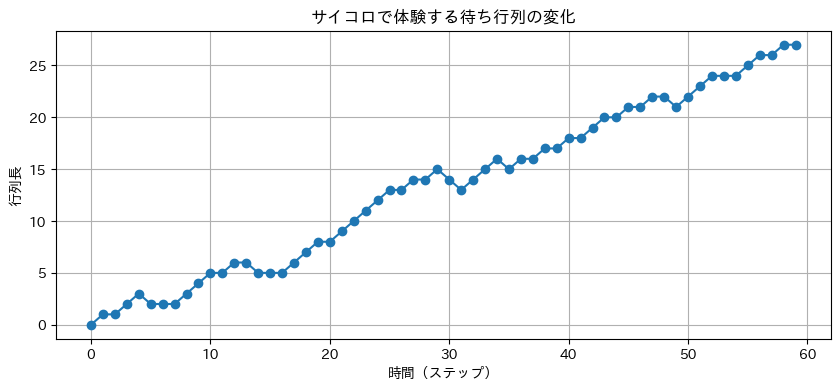

In [35]:
import random
import matplotlib.pyplot as plt
import japanize_matplotlib

# シミュレーション設定
steps = 60  # 試行回数（時間ステップ: 1ステップ=1分間）
queue = 0   # 初期の行列長
queue_lengths = []
x = 5
y = 3

for t in range(steps):
    # サイコロで到着判定（1〜xで到着）
    arrival_roll = random.randint(1, 6) # サイコロを振る
    if arrival_roll <= x:
        queue += 1
    #    print(f"[{t:02d}] 客が来た → 行列長: {queue}")
    #else:
    #    print(f"[{t:02d}] 客は来ない → 行列長: {queue}")

    # サイコロでサービス判定（1〜4で処理できる）
    service_roll = random.randint(1, 6)
    if service_roll <= y and queue > 0:
        queue -= 1
    #    print(f"       サービス成功 → 行列長: {queue}")
    #elif queue > 0:
    #    print(f"       サービス失敗 → 行列長: {queue}")
    #else:
    #    print(f"       サービス試行（誰もいない）")

    queue_lengths.append(queue)

# グラフ表示
plt.figure(figsize=(10, 4))
plt.plot(queue_lengths, marker='o')
plt.title("サイコロで体験する待ち行列の変化")
plt.xlabel("時間（ステップ）")
plt.ylabel("行列長")
plt.grid(True)
plt.show()

## 到着過程
- ポアソン分布と呼ばれる確率分布に従わせることで、「自然なランダム性」を直感的に表現できる
- ポアソン分布を用いるときの仮定
  - 独立性: 各到着は他と無関係
  - 定常性: どの時刻でも同じ平均到着率
  - 1度に1人しか来ない: 極短い時間では重なって来ない
  - 記憶なし: 次の到着は「今まで何もなかった」かのように振る舞う
- ポアソン分布が用いられる理由
  - 感覚的: ランダムだけど平均的に来る現象を自然に表現できる
  - 数学的: 独立・定常・記憶なし→ポアソン分布しか成立しない
  - 現実的: 到着間隔がバラバラな現象（客・ジョブ）に合っている

[006分目] 客が来た！
[010分目] 客が来た！
[011分目] 客が来た！
[013分目] 客が来た！
[016分目] 客が来た！
[046分目] 客が来た！
[047分目] 客が来た！
[053分目] 客が来た！
[055分目] 客が来た！
[058分目] 客が来た！
[059分目] 客が来た！
[061分目] 客が来た！
[066分目] 客が来た！
[088分目] 客が来た！


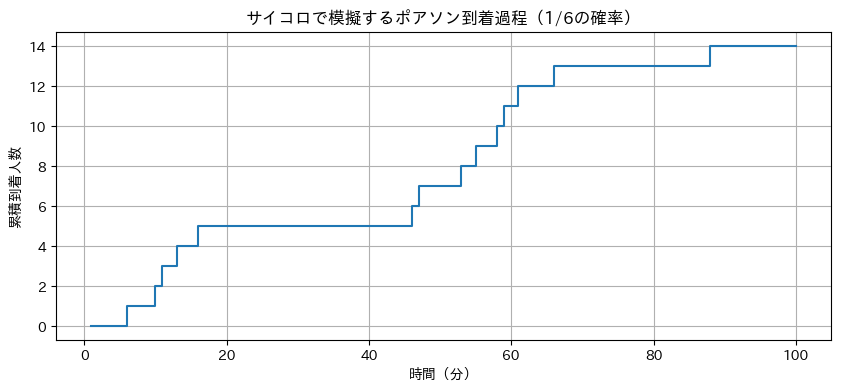

In [36]:
import random
import matplotlib.pyplot as plt

# パラメータ設定
minutes = 100             # シミュレーション時間（単位：分）
arrival_probability = 1/6  # 1分あたりの到着確率 ≒ ポアソン過程λ=1/6

# 結果保存
arrivals = []
arrival_times = []

# シミュレーション開始
for t in range(1, minutes + 1):
    dice = random.randint(1, 6)
    if dice == 1:  # 出目1のときに到着
        arrivals.append(1)
        arrival_times.append(t)
        print(f"[{t:03d}分目] 客が来た！")
    else:
        arrivals.append(0)

# 累積到着数
cumulative = [sum(arrivals[:i+1]) for i in range(len(arrivals))]

# グラフ描画
plt.figure(figsize=(10, 4))
plt.step(range(1, minutes + 1), cumulative, where='post')
plt.xlabel("時間（分）")
plt.ylabel("累積到着人数")
plt.title("サイコロで模擬するポアソン到着過程（1/6の確率）")
plt.grid(True)
plt.show()

### 離散的サイコロ到着 vs ポアソン分布
- サイコロで模擬した到着過程が、理論的なポアソン分布に近づいていることを視覚的に確認する
- サイコロを使って「一定確率で客が来る」シミュレーションを多数回実施
- 各試行で「n分間に何人来たか」を記録
- その出現回数分布（ヒストグラム）と理論的なポアソン分布を重ねてプロット

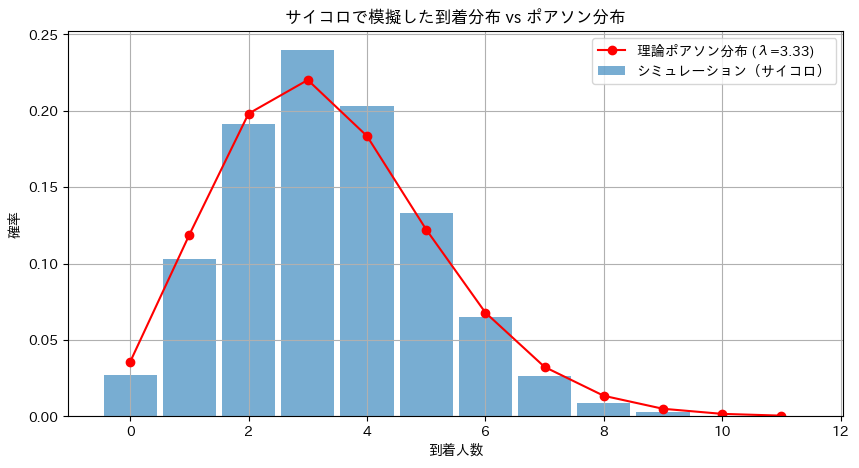

In [39]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

# --- 設定 ---
arrival_probability = 1/6  # サイコロで出目1が出たら客が来る
interval_minutes = 20     # 1回の試行での観測時間
num_trials = 10000         # 試行回数（大きくするとポアソン分布に近づく）

arrival_counts = []  # 各試行での到着人数を記録

# --- シミュレーション ---
for _ in range(num_trials):
    count = 0
    for _ in range(interval_minutes):
        if random.randint(1, 6) == 1:
            count += 1
    arrival_counts.append(count)

# --- ヒストグラム作成 ---
max_count = max(arrival_counts)
values, bins = np.histogram(arrival_counts, bins=range(max_count + 2), density=True)
x = bins[:-1]

# --- 理論的ポアソン分布の計算 ---
λ = interval_minutes * arrival_probability  # 理論上の平均到着数
poisson_probs = poisson.pmf(x, mu=λ)

# --- グラフ表示 ---
plt.figure(figsize=(10, 5))
plt.bar(x, values, width=0.9, alpha=0.6, label="シミュレーション（サイコロ）")
plt.plot(x, poisson_probs, 'ro-', label=f"理論ポアソン分布 (λ={λ:.2f})")
plt.xlabel("到着人数")
plt.ylabel("確率")
plt.title("サイコロで模擬した到着分布 vs ポアソン分布")
plt.legend()
plt.grid(True)
plt.show()

## サービス過程
- サービス時間は指数分布に従うと仮定すると、「すぐ終わることもあれば、長くかかることもある」ような処理時間を直感的かつ数学的にうまくモデル化できる


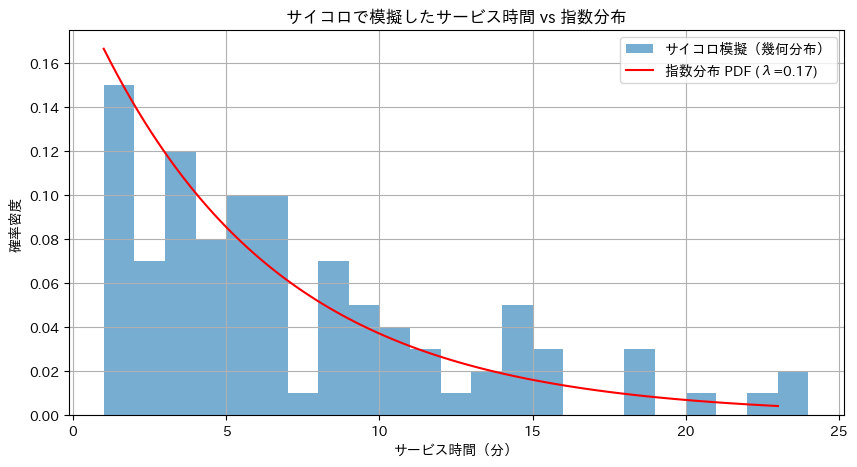

In [47]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon

# --- パラメータ設定 ---
p = 1/6               # サービスが1分ごとに終了する確率（= 出目1で終了）
num_trials = 100    # 試行回数

# --- サイコロによるサービス時間の模擬（幾何分布） ---
service_times = []

for _ in range(num_trials):
    time = 1
    while random.randint(1, 6) != 1:
        time += 1
    service_times.append(time)

# --- ヒストグラム（正規化） ---
service_times_np = np.array(service_times)
service_times_cont = service_times_np  # ここでは時間間隔1分と仮定
max_t = np.percentile(service_times_cont, 99)  # 外れ値を切る
bins = np.arange(1, max_t + 1.5)

# --- 理論的な指数分布 ---
λ = p  # 平均サービス時間 = 1/p
x = np.linspace(1, max_t, 100)
pdf_exp = λ * np.exp(-λ * (x - 1))  # 開始が1分目からなのでシフト

# --- プロット ---
plt.figure(figsize=(10, 5))
plt.hist(service_times_cont, bins=bins, density=True, alpha=0.6, label='サイコロ模擬（幾何分布）')
plt.plot(x, pdf_exp, 'r-', label=f'指数分布 PDF (λ={λ:.2f})')
plt.xlabel("サービス時間（分）")
plt.ylabel("確率密度")
plt.title("サイコロで模擬したサービス時間 vs 指数分布")
plt.legend()
plt.grid(True)
plt.show()

## 例題
ある窓口で顧客が平均1分あたり0.8人($\lambda=0.8$)の割合で到着し、1人の係員が平均1分あたり1人($\mu =1.0$)の速度でサービスを提供する。システムを10,000分間シミュレーションして、以下を求める。
- 各時点での待ち行列長（人数）
- 各顧客の待ち時間
- 平均待ち時間・平均待ち行列長の計測
- 計測値と理論値との比較
  - 利用率: $\rho=\lambda/\mu=0.8$
  - 平均待ち時間の理論値: $W_q = \frac{\rho}{\mu(1-\rho)}=4$
  - 平均待ち行列長の理論値: $L_q = \frac{\rho^2}{1-\rho}=3.2 $

平均待ち時間（シミュレーション）：3.4923 分
平均待ち時間（理論値）　　　　：4.0000 分

平均待ち行列長（シミュレーション）：3.1897 人
平均待ち行列長（理論値）　　　　：3.2000 人


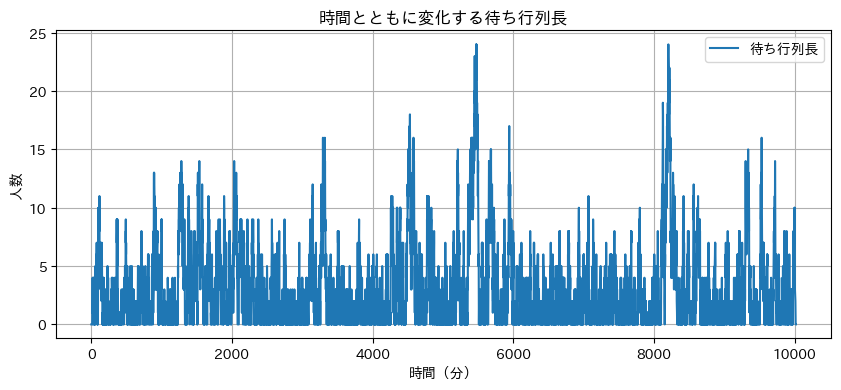

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

# パラメータ設定
lambda_rate = 0.8  # 到着率（人/分）
mu_rate = 1.0      # サービス率（人/分）
sim_time = 10000   # シミュレーション時間（分）

# イベントスケジューラ
event_queue = []  # (時刻, 種類, 顧客ID)
heapq.heapify(event_queue)

# 初期化
np.random.seed(42)
time = 0
next_customer_id = 0
server_busy = False
queue = []
arrival_times = {}   # 顧客ID → 到着時刻
service_times = {}   # 顧客ID → サービス開始時刻
departure_times = {} # 顧客ID → サービス終了時刻
queue_lengths = []

# 最初の到着をスケジュール
def schedule_arrival(current_time):
    global next_customer_id
    interarrival_time = np.random.exponential(1 / lambda_rate)
    arrival_time = current_time + interarrival_time
    if arrival_time < sim_time:
        heapq.heappush(event_queue, (arrival_time, "arrival", next_customer_id))
        arrival_times[next_customer_id] = arrival_time
        next_customer_id += 1

schedule_arrival(0)

# メインイベントループ
while event_queue:
    time, event_type, customer_id = heapq.heappop(event_queue)

    # イベントごとに処理
    if event_type == "arrival":
        schedule_arrival(time)
        if not server_busy:
            # サービス即開始
            service_start = time
            service_time = np.random.exponential(1 / mu_rate)
            service_times[customer_id] = service_start
            departure_time = service_start + service_time
            departure_times[customer_id] = departure_time
            heapq.heappush(event_queue, (departure_time, "departure", customer_id))
            server_busy = True
        else:
            # 待ち行列に追加
            queue.append(customer_id)

    elif event_type == "departure":
        if queue:
            # 待ち行列から次の客を処理
            next_customer = queue.pop(0)
            service_start = time
            service_time = np.random.exponential(1 / mu_rate)
            service_times[next_customer] = service_start
            departure_time = service_start + service_time
            departure_times[next_customer] = departure_time
            heapq.heappush(event_queue, (departure_time, "departure", next_customer))
        else:
            server_busy = False

    queue_lengths.append((time, len(queue)))

# 結果の分析
wait_times = []
system_times = []
for cid in service_times:
    wait = service_times[cid] - arrival_times[cid]
    total = departure_times[cid] - arrival_times[cid]
    wait_times.append(wait)
    system_times.append(total)

mean_wait = np.mean(wait_times)
mean_queue_length = np.mean([length for _, length in queue_lengths])

# 理論値
rho = lambda_rate / mu_rate
theoretical_wait = rho / (mu_rate * (1 - rho))
theoretical_queue_length = rho**2 / (1 - rho)

# 結果表示
print(f"平均待ち時間（シミュレーション）：{mean_wait:.4f} 分")
print(f"平均待ち時間（理論値）　　　　：{theoretical_wait:.4f} 分\n")

print(f"平均待ち行列長（シミュレーション）：{mean_queue_length:.4f} 人")
print(f"平均待ち行列長（理論値）　　　　：{theoretical_queue_length:.4f} 人")

# 時系列プロット
times, lengths = zip(*queue_lengths)
plt.figure(figsize=(10, 4))
plt.plot(times, lengths, label="待ち行列長")
plt.xlabel("時間（分）")
plt.ylabel("人数")
plt.title("時間とともに変化する待ち行列長")
plt.grid(True)
plt.legend()
plt.show()

## 課題: 顧客満足度を保ちながら、窓口運営コストを最小化するには？
### 背景
あるサービス施設は、1つの窓口で対応しており、顧客は平均1分あたり0.9人($\lambda=0.9$)の割合で到着する。この施設では、以下の2つの要件を同時に満たしたい。
- 顧客の平均待ち時間$W_q$ を5分以内に抑える
- 窓口の運営コストをなるべく下げたい（=高すぎるサービス率は避けたい）

#### [課題1]
$\mu$(サービス率)を1.0〜1.5の範囲で変化させながら、
- シミュレーションを実行し
- 各$\mu$における平均待ち時間$W_q$を記録せよ。
- 理論値との比較も行い、シミュレーション精度を確認せよ。

#### [課題2]
- 要件「平均待ち時間が5分以内」を満たす最小のサービス率$\mu$を見つけよ。

#### [課題3]
- $\mu$を上げると窓口職員のコストが増えると仮定し、コスト関数
$Cost(\mu) = 1000+300(\mu-1.0)^2$
を導入する
- 「待ち時間5分以下」と「コスト最小化」の両立を目指し、最適な$\mu$を決定せよ。